In [94]:
import pandas as pd
import numpy as np
import PIL.Image as Image
import glob
from tqdm import tqdm_notebook
import cv2
import lasio
import sys
from sklearn import preprocessing
import pickle
import pkg_resources
from skimage import feature, color, filters, morphology, segmentation
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('./core_photo_force/scripts_modules/')

In [95]:
wellid='6406_3_2'
w6406=lasio.read('./data/{}_grainsize.las'.format(wellid))
print(w6406.keys())
depth = w6406['DEPT']
grain_size = w6406['GRAIN_SIZE']
grain_size

['DEPT', 'GRAIN_SIZE']


array([    nan,     nan,     nan, ..., 3.68451, 4.29296, 4.14085])

In [96]:
w6406 = pd.DataFrame([depth, grain_size])
w6406 = w6406.T
w6406.head(5)
w6406.columns = ['depth', 'gs']

In [97]:
objects = []
with open('./feature_table.pkl', 'rb') as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
feature_table = objects[0]

feature_table.shape

(500, 16)

In [98]:
feature_table.head(5)

,Dilated Horz Image,Dilated Vert Image,Segment Count,Sobel H sum,Sobel V sum,Sum Blue,Sum Green,Sum Luminance,Sum Red,bad_core,gabor filter sum,grain_size,is_sand,max h edge count,max v edge count,sed_structure_code
0,6440,6935,28,4.8531,-17.9298,17665,17998,14473.5,18190,0,20.8953,None,0,103,35,None
1,8378,11213,30,42.9751,-25.2548,18826,19356,4428.04,17659,1,6.5328,0,1,46,60,1
2,7129,10244,30,-12.1109,3.50361,18750,19710,10182.2,19383,0,14.7061,None,0,41,56,None
3,8564,8943,22,-9.98167,-26.6821,19868,18731,13563.8,18314,0,19.7664,None,0,39,51,None
4,3954,6052,29,0.000510196,17.6159,18724,18900,3314.5,20728,1,4.56973,0,1,30,64,2


In [99]:
feature_cols = ['Dilated Horz Image', 'Dilated Vert Image', 'Segment Count',
       'Sobel H sum', 'Sobel V sum', 'Sum Blue', 'Sum Green', 'Sum Luminance',
       'Sum Red', 'max h edge count', 'max v edge count']
y_cols =  ['bad_core', 'grain_size', 'is_sand', 'sed_structure_code']

x_table = feature_table[feature_cols]
y_table = feature_table[y_cols]

In [100]:
from sklearn import preprocessing, model_selection

X_train, X_test, y_train, y_test =  model_selection.train_test_split(x_table, y_table)
print(X_train.shape)
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(375, 11)


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from core_photo_force.scripts_modules.well_core import process_image
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.iloc[:, 0])
y_pred_train = model.predict(X_train)
print(accuracy_score(y_pred_train, y_train.iloc[:, 0]))
y_pred_test = model.predict(X_test)
print(accuracy_score(y_pred_test, y_test.iloc[:, 0]))
print(y_pred_train)

1.0
0.832
['0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '0'
 '1' '1' '0' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1'
 '1' '1' '0' '0' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1'
 '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1'
 '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '1'
 '1' '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '0' '1' '1' '1' '0'
 '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' 

In [102]:
#w6406 = w6406[['DEPT','GRAIN_SIZE']]
w64 = w6406[w6406>0].dropna()

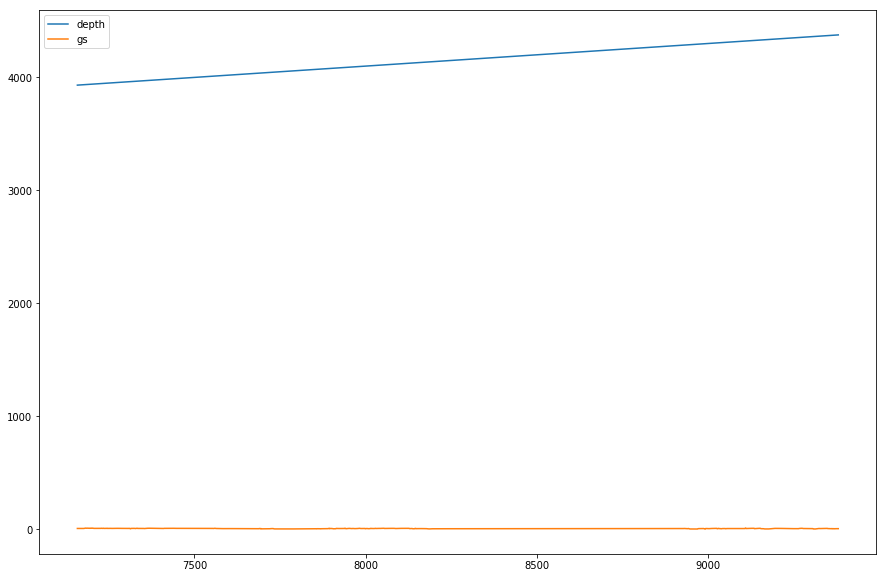

In [103]:
%matplotlib inline
#w64 = w64.set_index('depth')
w64.plot(figsize=(15,10))

In [104]:
imgs = glob.glob('./data/well_{}/*.jpg'.format(wellid))
train_df = pd.DataFrame(imgs)
train_df.columns=['imgName']

In [105]:
train_df['img'] = [np.array(cv2.imread("{}".format(idx))) for idx in tqdm_notebook(train_df.imgName)]


HBox(children=(IntProgress(value=0, max=293), HTML(value='')))

In [106]:
train_df['imgsize'] = train_df['img'].apply(lambda x: x.shape)

In [107]:
print('max dimension', train_df['imgsize'].max())
print('min dimension', train_df['imgsize'].min())

max dimension (2400, 265, 3)
min dimension (1919, 224, 3)


In [108]:
train_df['imgName']

0      ./data/well_6406_3_2/6406_3_2_4027_4028.jpg
1      ./data/well_6406_3_2/6406_3_2_3984_3985.jpg
2      ./data/well_6406_3_2/6406_3_2_4050_4051.jpg
3      ./data/well_6406_3_2/6406_3_2_3977_3978.jpg
4      ./data/well_6406_3_2/6406_3_2_4138_4139.jpg
5      ./data/well_6406_3_2/6406_3_2_3971_3972.jpg
6      ./data/well_6406_3_2/6406_3_2_3941_3942.jpg
7      ./data/well_6406_3_2/6406_3_2_4077_4078.jpg
8      ./data/well_6406_3_2/6406_3_2_4056_4057.jpg
9      ./data/well_6406_3_2/6406_3_2_4125_4126.jpg
10     ./data/well_6406_3_2/6406_3_2_3987_3988.jpg
11     ./data/well_6406_3_2/6406_3_2_3991_3992.jpg
12     ./data/well_6406_3_2/6406_3_2_4073_4074.jpg
13     ./data/well_6406_3_2/6406_3_2_4337_4338.jpg
14     ./data/well_6406_3_2/6406_3_2_4003_4004.jpg
15     ./data/well_6406_3_2/6406_3_2_4025_4026.jpg
16     ./data/well_6406_3_2/6406_3_2_4092_4093.jpg
17     ./data/well_6406_3_2/6406_3_2_4102_4103.jpg
18     ./data/well_6406_3_2/6406_3_2_4076_4077.jpg
19     ./data/well_6406_3_2/640

In [109]:
train_df['startDepth'] = train_df.imgName.str.replace('.jpg','').str.split('_').str[-2].astype(float)
train_df['endDepth'] = train_df.imgName.str.replace('.jpg','').str.split('_').str[-1].astype(float)
train_df['wellname']= train_df.imgName.str.split('/').str[2]

In [110]:
sd = train_df.startDepth.values
ed = train_df.endDepth.values
gsd = w64.depth.values
gs = w64.gs.values

i,j = np.where((gsd[:,None] >= sd) & (gsd[:,None] <ed))
w64joined= pd.DataFrame(np.column_stack([w64.values[i],train_df.values[j]]), columns=w64.columns.append(train_df.columns))

In [111]:
w64s = w64joined[['gs','depth','imgName','startDepth','endDepth','wellname']]

In [112]:
w64joined_2000x260=w64joined
#Resize the image to 2000x260
w64joined_2000x260['img'] = w64joined_2000x260.apply(lambda x: cv2.resize(x['img'], (260, 2000)), axis=1)


In [113]:
# crop the sides of the image to 244
w64joined_2000x244=w64joined_2000x260
w64joined_2000x244['img'] = w64joined_2000x260.apply(lambda x: x['img'][:, 18:242], axis=1)


In [114]:
def processImg(xratio,img):
    xs = int(xratio * img.shape[0])
    xe = int((xratio + 0.2)*img.shape[0])
    newimg = img[xs:xe]
    return [newimg]
w64joined_2000x244['sdratio'] = (w64joined_2000x244['depth'] - w64joined_2000x244['startDepth'])/ \
( w64joined_2000x244['endDepth'] - w64joined_2000x244['startDepth']) - 0.15
w64joined_2000x244['imgp'] =  w64joined_2000x244[['sdratio','img']].apply(lambda x:processImg(x[0],x[1]),axis=1)

In [115]:
w64joined['imgp'][0][0].shape

(400, 224, 3)

In [116]:
w64joined_224x224=w64joined
#Resize the image to 2000x260
w64joined_224x224['img'] = w64joined_224x224.apply(lambda x: cv2.resize(x['imgp'][0], (224, 448)), axis=1)

In [117]:
w64joined_224x224['imgcrop'] = w64joined_224x224.apply(lambda x: x['img'][200:350,40:190,:], axis=1)

In [118]:
from joblib import Parallel, delayed
from math import sqrt

def testimg(img):
    print(img.shape)
    return process_image(img)
def markGoodBad(img):
    imgs = [im for im in img]
    print('imgs',np.array(imgs).shape)
    to_pred = np.array(imgs)
    feature = Parallel(n_jobs=7)(delayed(testimg)(im) for im in to_pred[:])
    print(np.array(feature).shape)
    features = pd.concat(feature, axis=1)
    #feature = [ testimg(im) for im in to_pred[:]]
    x_table = features.T[feature_cols]
    testData = scaler.transform(x_table)
    res = model.predict(testData)
    return res
    
#w64joined_224x224['img'] = w64joined_224x224.apply(lambda x: markGoodBad(x['imgp']), axis=1)
w64joined_224x224['goodbad'] =markGoodBad( w64joined_224x224['imgcrop'])

imgs (1338, 150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [92]:
w64joined_224x224['goodbadn'] = pd.to_numeric(w64joined_224x224['goodbad'])

In [93]:
import os

def saveImage(img,name):
    img2save = Image.fromarray(img)
    img2save.save(name)

i=0
for idx,d in w64joined_224x224.iterrows():
    i = i + 1
    if d['goodbadn'] == 0:
        continue
    gs = round( d['gs'])
    
    print(gs)
    path = os.path.join('./data','testImgDB',str(gs))
    if not os.path.exists(path):
        os.makedirs(path)
    name = d['wellname'] +"_" + str(d['startDepth']) + "_" + str(d['endDepth'])+"_" + str(i) 
    print('name is ', name)
    saveImage(d['img'][:224,:,:],os.path.join(path,name+"1.png"))
    saveImage(d['img'][224:,:,:],os.path.join(path,name+"2.png"))

    

8
name is  well_6506_12_6_4312.0_4313.0_2
8
name is  well_6506_12_6_4312.0_4313.0_4
8
name is  well_6506_12_6_4312.0_4313.0_5
8
name is  well_6506_12_6_4313.0_4314.0_6
8
name is  well_6506_12_6_4313.0_4314.0_8
8
name is  well_6506_12_6_4313.0_4314.0_9
6
name is  well_6506_12_6_4314.0_4315.0_12
8
name is  well_6506_12_6_4315.0_4316.0_14
9
name is  well_6506_12_6_4315.0_4316.0_18
9
name is  well_6506_12_6_4316.0_4317.0_23
9
name is  well_6506_12_6_4318.0_4319.0_29
8
name is  well_6506_12_6_4318.0_4319.0_33
6
name is  well_6506_12_6_4321.0_4322.0_39
6
name is  well_6506_12_6_4321.0_4322.0_40
6
name is  well_6506_12_6_4321.0_4322.0_43
9
name is  well_6506_12_6_4324.0_4325.0_53
8
name is  well_6506_12_6_4324.0_4325.0_55
8
name is  well_6506_12_6_4327.0_4328.0_69
8
name is  well_6506_12_6_4328.0_4329.0_72
8
name is  well_6506_12_6_4328.0_4329.0_75
9
name is  well_6506_12_6_4330.0_4331.0_82
10
name is  well_6506_12_6_4330.0_4331.0_84
10
name is  well_6506_12_6_4331.0_4332.0_88
9
name is  well

9
name is  well_6506_12_6_4515.0_4516.0_591
7
name is  well_6506_12_6_4517.0_4518.0_599
9
name is  well_6506_12_6_4518.0_4519.0_604
9
name is  well_6506_12_6_4519.0_4520.0_607
9
name is  well_6506_12_6_4519.0_4520.0_610
7
name is  well_6506_12_6_4521.0_4522.0_615
7
name is  well_6506_12_6_4522.0_4523.0_616
8
name is  well_6506_12_6_4523.0_4524.0_621
8
name is  well_6506_12_6_4523.0_4524.0_622
8
name is  well_6506_12_6_4524.0_4525.0_625
7
name is  well_6506_12_6_4525.0_4526.0_630
7
name is  well_6506_12_6_4525.0_4526.0_632
7
name is  well_6506_12_6_4526.0_4527.0_634
7
name is  well_6506_12_6_4526.0_4527.0_635
6
name is  well_6506_12_6_4527.0_4528.0_638
5
name is  well_6506_12_6_4527.0_4528.0_639
9
name is  well_6506_12_6_4530.0_4531.0_656
10
name is  well_6506_12_6_4531.0_4532.0_658
8
name is  well_6506_12_6_4531.0_4532.0_661
8
name is  well_6506_12_6_4531.0_4532.0_662
8
name is  well_6506_12_6_4532.0_4533.0_664
7
name is  well_6506_12_6_4532.0_4533.0_665
6
name is  well_6506_12_6_4533.